In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats
from patsy import dmatrices
from ipykernel import kernelapp as app
import statsmodels.api as sm
import statsmodels.formula.api as smf
import requests
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from pandas import DataFrame
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
from sklearn import linear_model
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [155]:
df_combo=pd.read_csv('mental_health_combo - mental_health_combo.csv')
df_combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 25 columns):
Abbreviation:                736 non-null object
Age (bin)                    736 non-null int64
Age                          736 non-null int64
F1                           736 non-null int64
Gender Female                736 non-null int64
Gender Male                  736 non-null int64
Gender Other                 736 non-null int64
Income                       736 non-null int64
Number of Records            736 non-null int64
Rate                         736 non-null float64
State                        736 non-null object
UFO                          736 non-null int64
Company Size                 736 non-null float64
Coworkers                    736 non-null int64
Family History               736 non-null int64
Leave                        736 non-null int64
Mental Health Consequence    736 non-null int64
Mental Vs Physical           736 non-null int64
Obs Consequence          

In [74]:
pd.set_option('display.max_columns', None)  

In [156]:
df_combo.head(5)

,Abbreviation:,Age (bin),Age,F1,Gender Female,Gender Male,Gender Other,Income,Number of Records,Rate,State,UFO,Company Size,Coworkers,Family History,Leave,Mental Health Consequence,Mental Vs Physical,Obs Consequence,Supervisor,Tech Company,Treatment,treatment_2,Wellness Program,Work Interfere
0,IL,36,37,0,1,0,0,61229,1,11.2,Illinois,2698,15.5,1,0,1,0,1,0,2,1,Yes,1,-1,3
1,IL,41,42,1,1,0,0,61229,1,11.2,Illinois,2698,300.0,2,1,-2,1,-1,0,2,1,Yes,1,-1,2
2,IL,27,29,2,1,0,0,61229,1,11.2,Illinois,2698,63.0,2,1,1,0,0,0,1,1,Yes,1,-1,1
3,IL,27,30,3,0,1,0,61229,1,11.2,Illinois,2698,63.0,1,1,0,1,0,0,2,1,Yes,1,-1,1
4,IL,32,32,4,0,1,0,61229,1,11.2,Illinois,2698,750.0,1,0,0,0,0,0,1,1,No,0,-1,0


In [157]:
df_combo = df_combo[['Treatment', 'Age', 'Gender Female', 'Gender Male', 'Gender Other', 'Income',  'Rate', 'UFO', 'Company Size', 'Coworkers', 'Family History', 'Leave', 'Mental Health Consequence', 'Mental Vs Physical', 'Obs Consequence', 'Supervisor', 'Tech Company', 'Wellness Program', 'Work Interfere']]

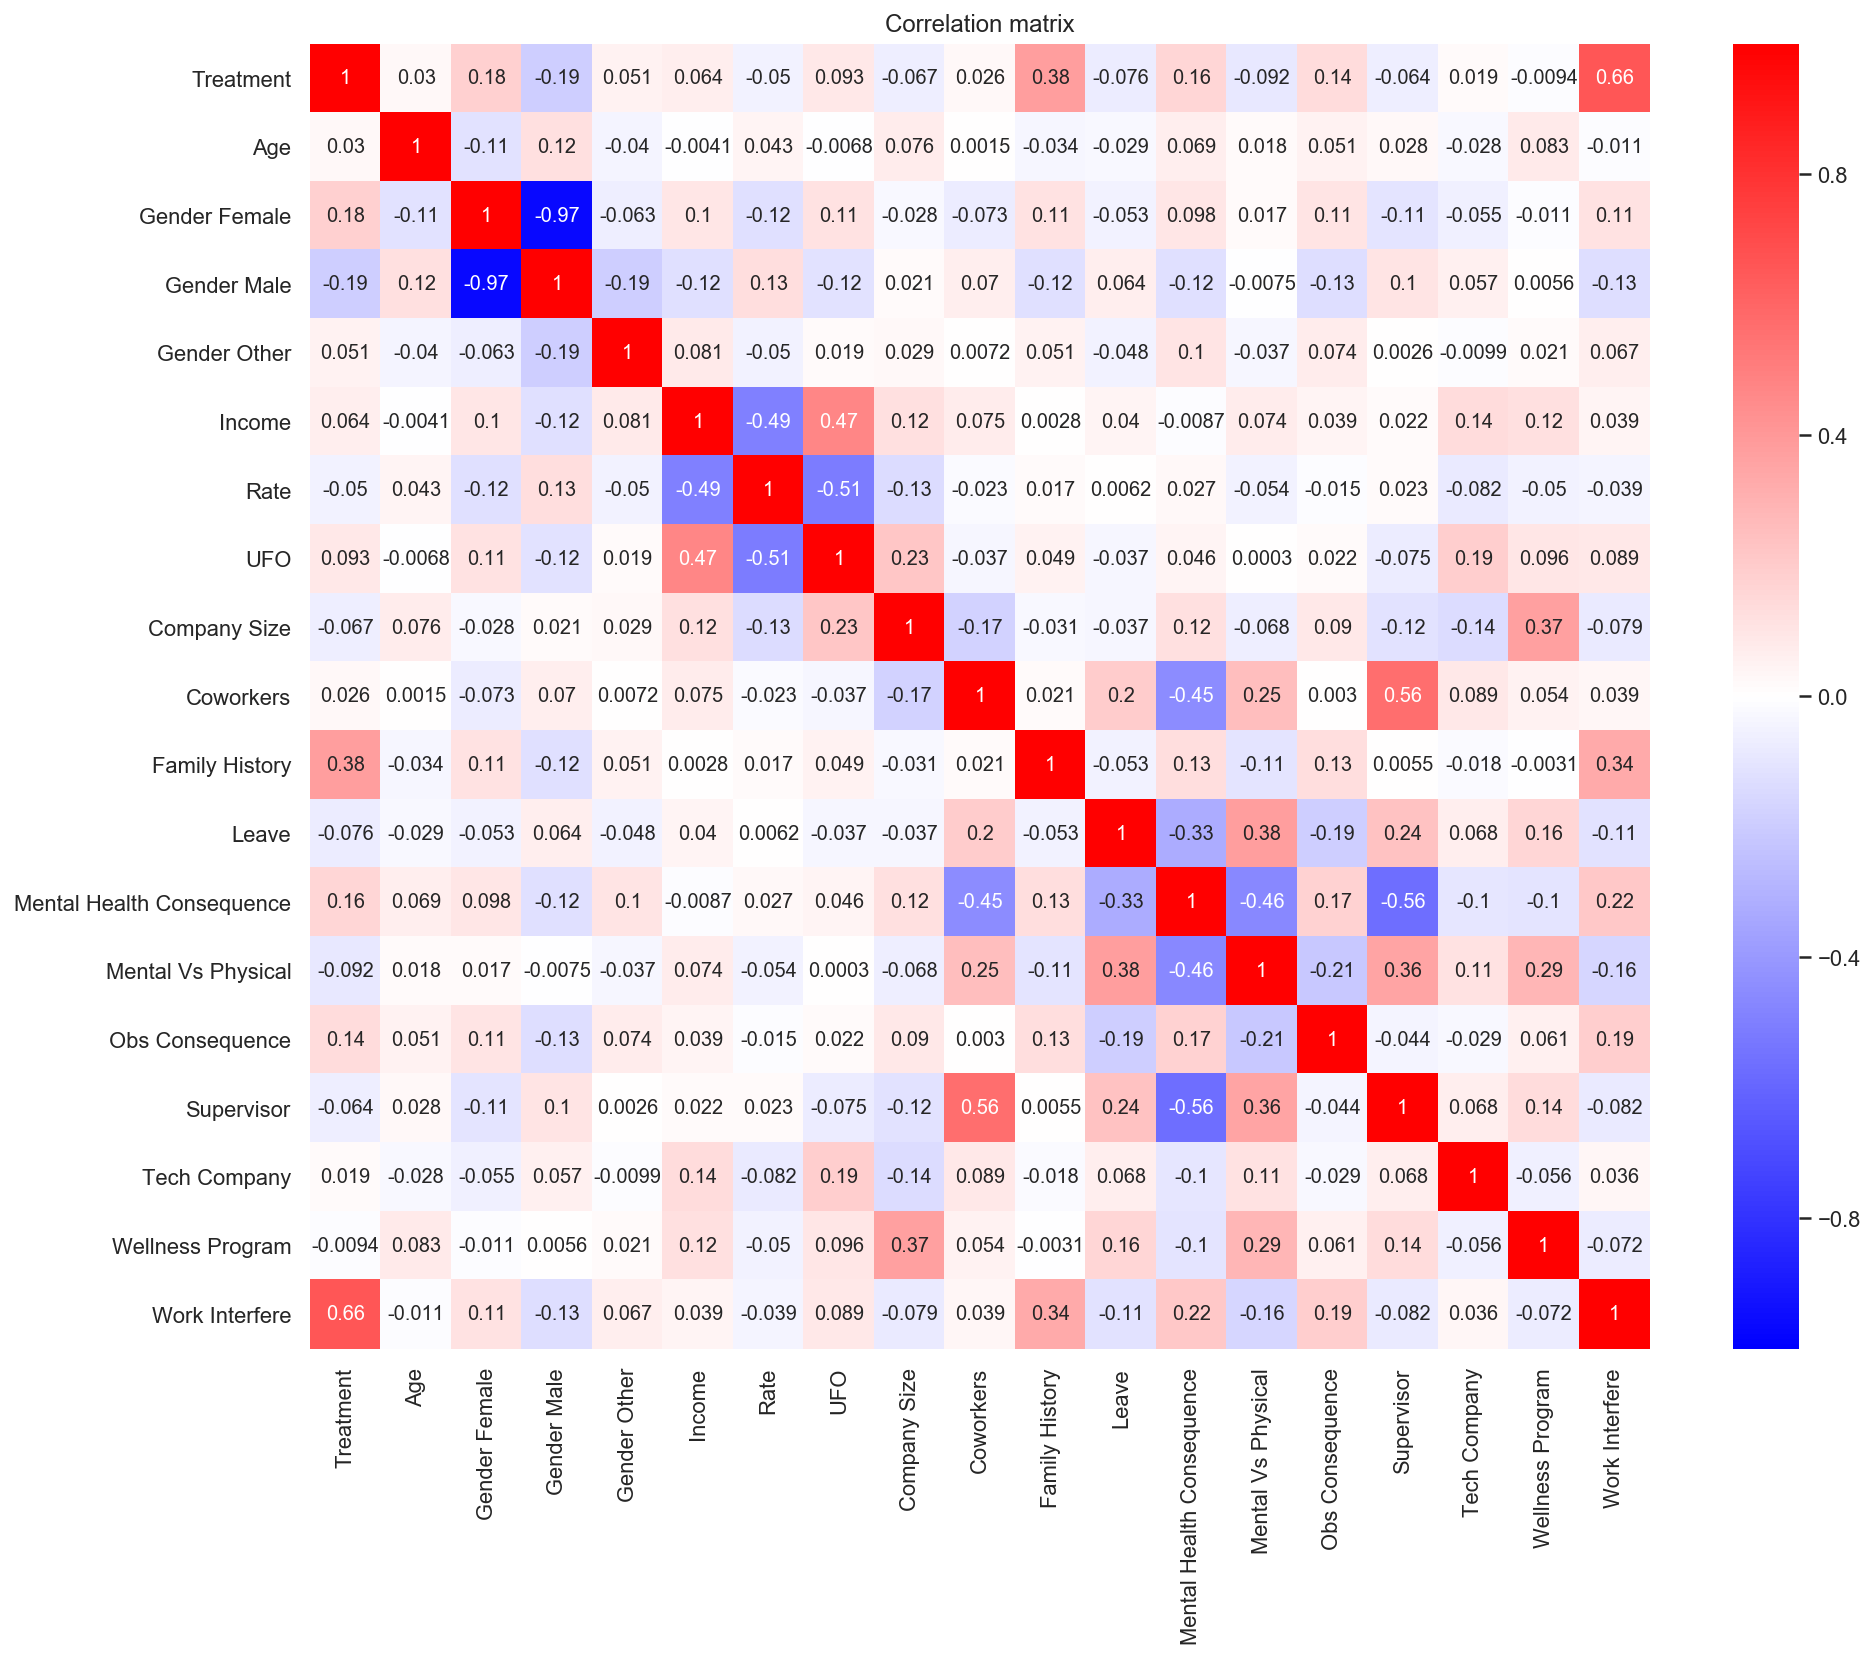

In [139]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_combo.corr(), cmap="bwr", annot=True, vmin=-1, vmax=1)
plt.title('Correlation matrix');

In [ ]:
#sns.pairplot(df_combo, hue='Treatment', palette="rocket");

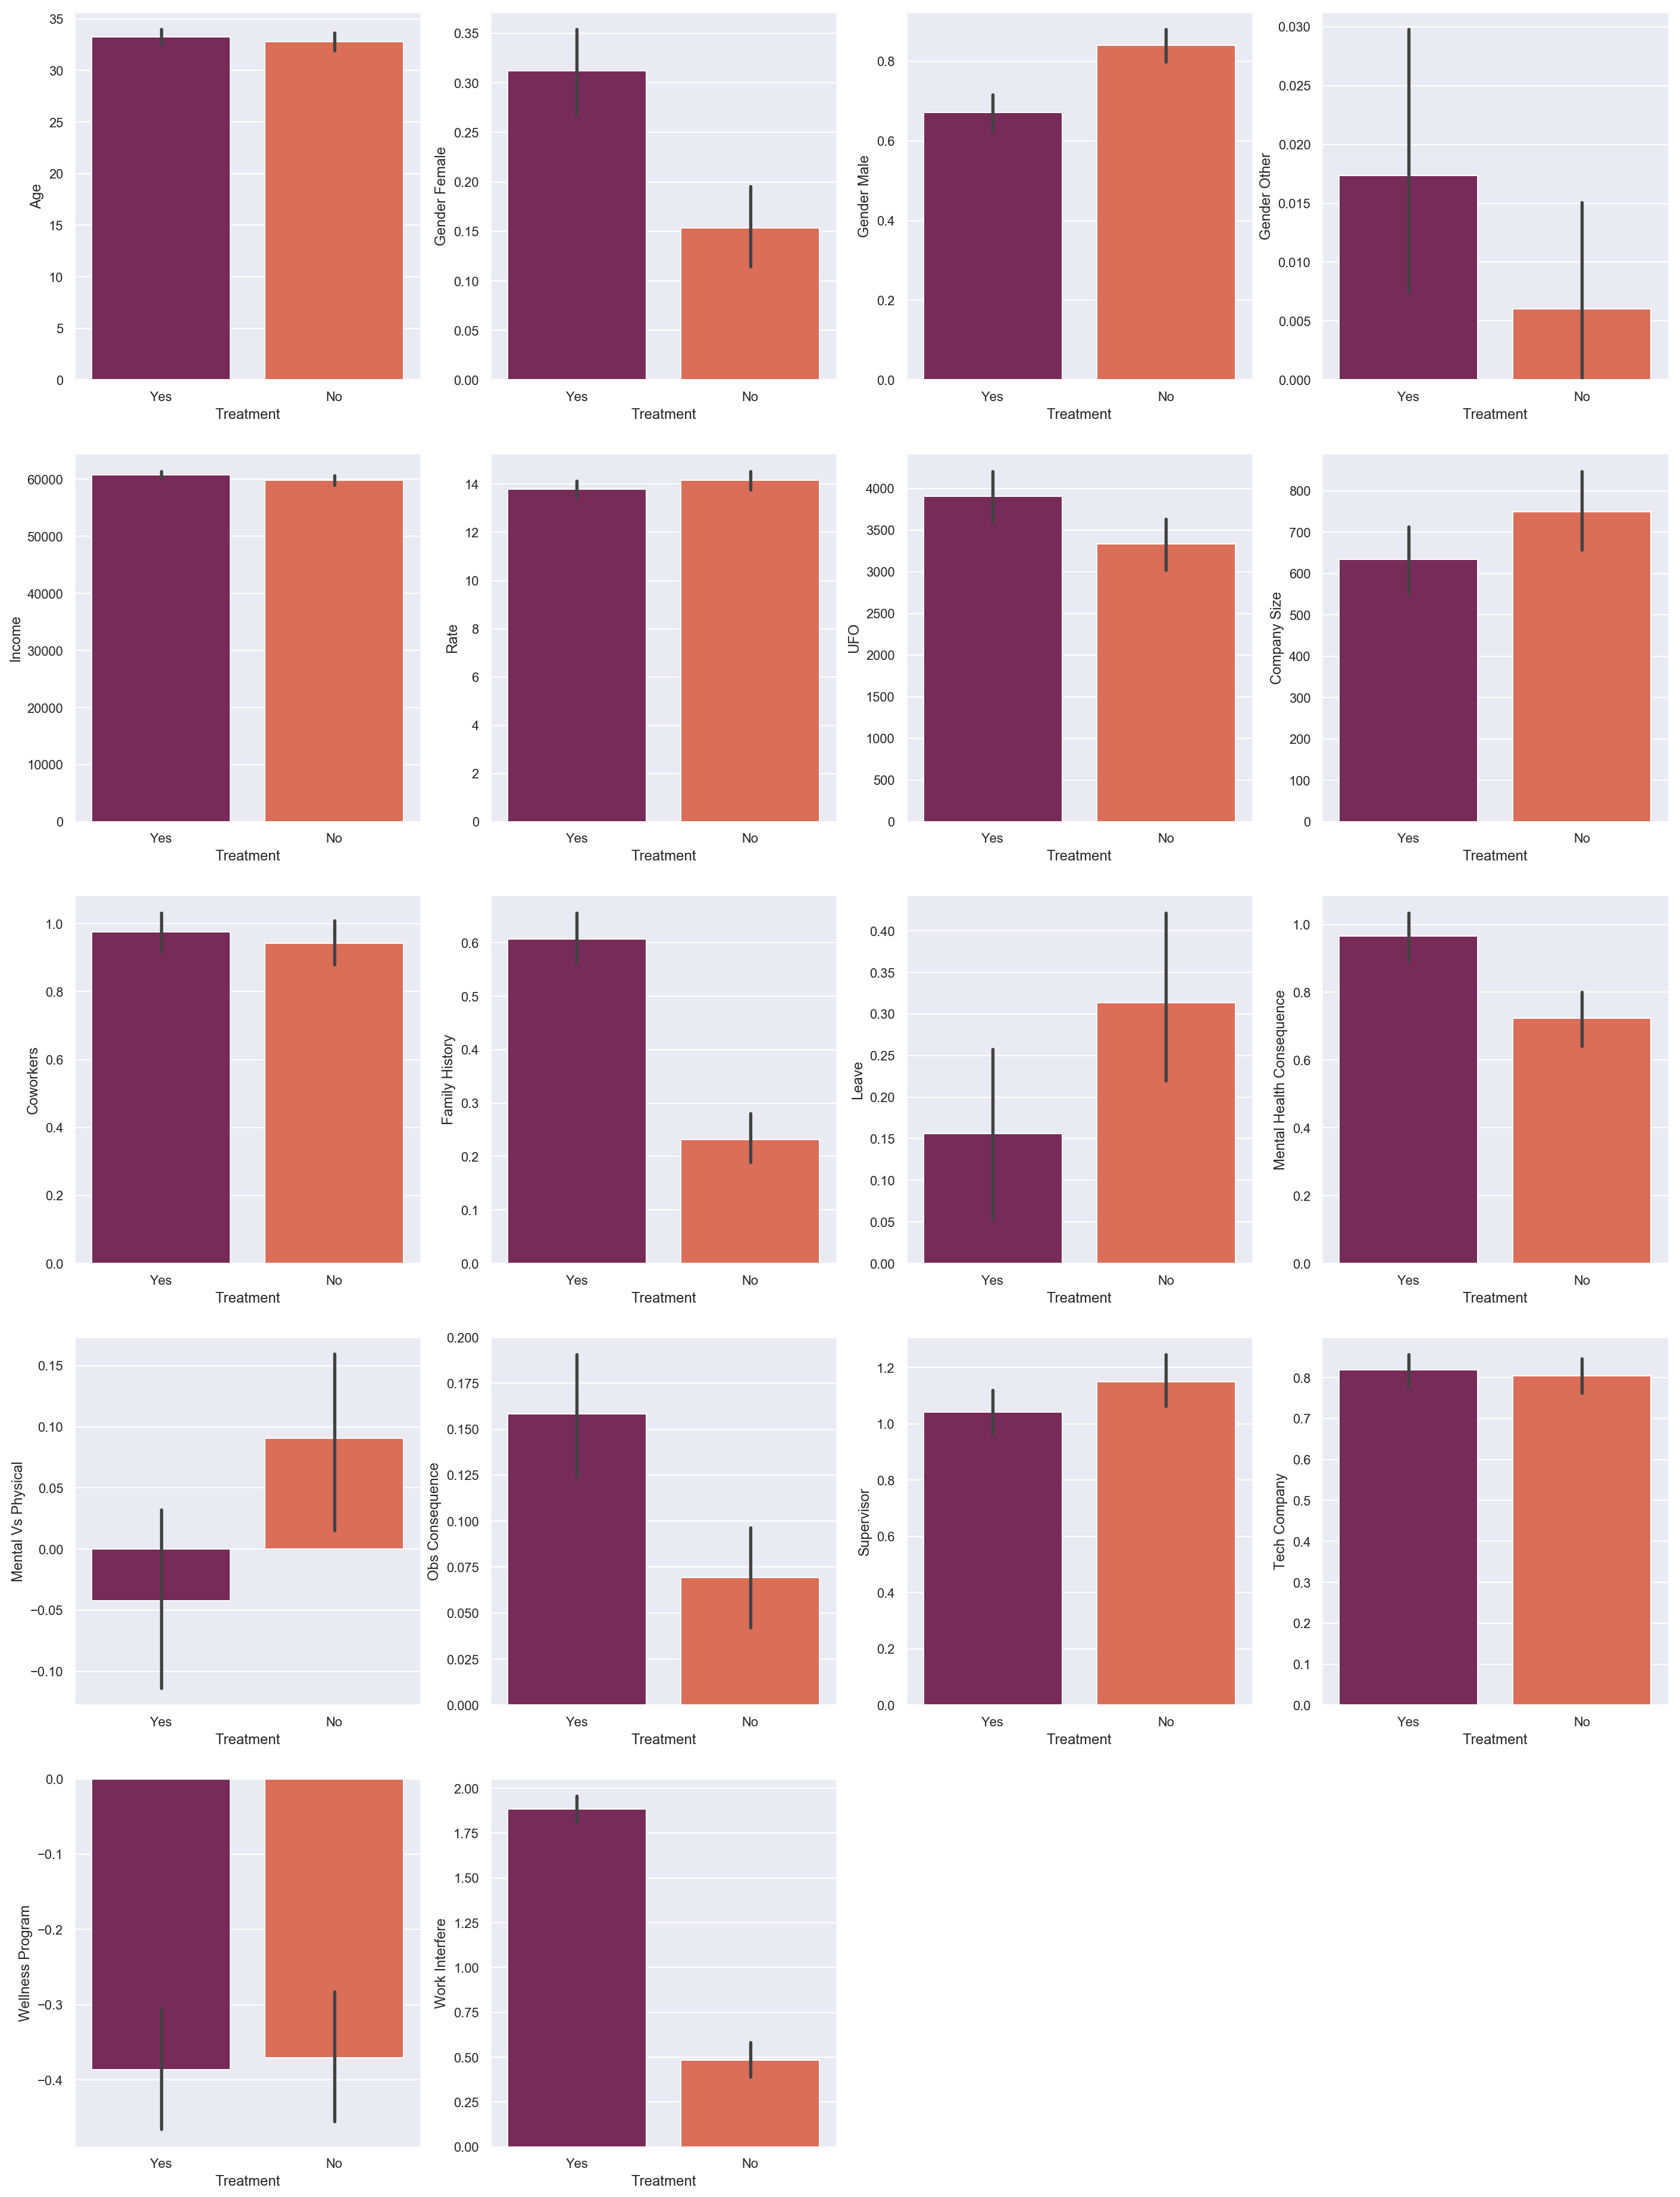

In [79]:
fig = plt.figure(figsize=(24,33))
features = ['Age', 'Gender Female', 'Gender Male', 'Gender Other', 'Income',  'Rate', 'UFO', 'Company Size', 'Coworkers', 'Family History', 'Leave', 'Mental Health Consequence', 'Mental Vs Physical', 'Obs Consequence', 'Supervisor', 'Tech Company', 'Wellness Program', 'Work Interfere']
for i in range(18):
    ax1 = fig.add_subplot(5,4,i+1)
    sns.barplot(x='Treatment', y=features[i],data=df_combo, palette='rocket')
    

In [158]:
df_combo['Treatment'] = df_combo['Treatment'].replace(to_replace=['Yes', 'No'], value = [1,0])

In [159]:
X = df_combo.drop('Treatment', axis=1)
y = df_combo['Treatment']

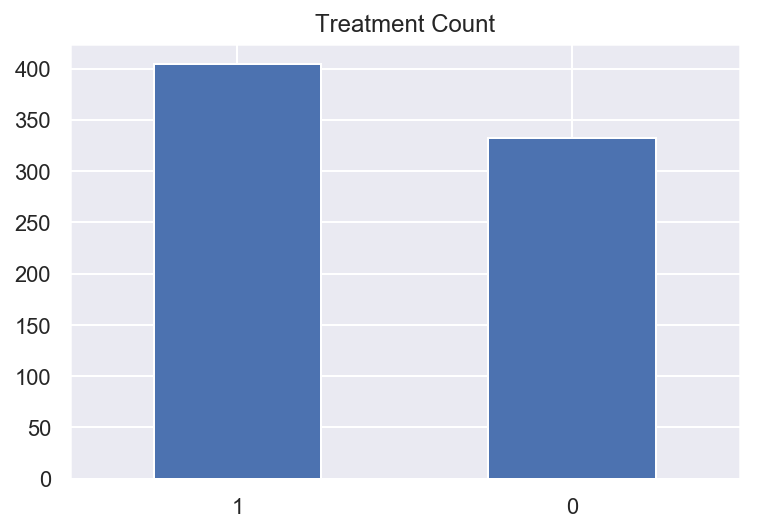

In [160]:
y.value_counts().plot(kind='bar', title='Treatment Count', rot=0);

In [161]:
X.shape, y.shape

((736, 18), (736,))

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [163]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((515, 18), (221, 18), (515,), (221,))

### StandardScaler

In [164]:
from sklearn.preprocessing import StandardScaler
X_scaler = X
Scaler=StandardScaler()

Scaler.fit(X)
X1=Scaler.transform(X)
X_scaler_train, X_scaler_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=40)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Logisitic Regression

In [165]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(C = 98)
logr.fit(X_scaler_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=98, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [166]:
logr.score(X_scaler_test, y_test)

0.8144796380090498

In [167]:
logr.coef_

array([[ 0.15832576,  0.19222279, -0.2047674 ,  0.06217781,  0.12466528,
         0.02688408,  0.021085  , -0.29123547,  0.06685578,  0.61242699,
        -0.02926485, -0.0155962 ,  0.08058497,  0.13260291, -0.14838217,
        -0.05614993,  0.15799959,  1.67962479]])

In [168]:
Coefficients = pd.DataFrame(zip(['Age', 'Gender Female', 'Gender Male', 'Gender Other', 'Income', 'Rate', 'UFO', 'Company Size', 'Coworkers', 'Family History', 'Leave', 'Mental Health Consequence', 'Mental Vs Physical', 'Obs Consequence', 'Supervisor', 'Tech Company', 'Wellness Program', 'Work Interfere'],*logr.coef_),columns =['Features','Coefficients']).\
            sort_values(by="Coefficients",ascending=False).reset_index(drop=True).round(2)

In [169]:
Coefficients

,Features,Coefficients
0,Work Interfere,1.68
1,Family History,0.61
2,Gender Female,0.19
3,Age,0.16
4,Wellness Program,0.16
5,Obs Consequence,0.13
6,Income,0.12
7,Mental Vs Physical,0.08
8,Coworkers,0.07
9,Gender Other,0.06


In [170]:
Coefficients.to_csv("Coefficients.csv")

In [171]:
confusion_matrix(y_test, logr.predict(X_scaler_test))

array([[83, 20],
       [21, 97]])

In [172]:
roc_auc_score(y_test, logr.predict_proba(X_scaler_test)[:,1])

0.8759256211946684

In [173]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, precision_score, recall_score
logr_accuracy = accuracy_score(y_test,logr.predict(X_scaler_test))
logr_accuracy

0.8144796380090498

In [184]:
def modelPerformance(model,  X_test,  y_test):
    scores = {}
    y_predict = model.predict(X_test)
    scores['accuracy'] = accuracy_score(y_test, y_predict )
    scores['precision'] = precision_score(y_test, y_predict)
    scores['recall'] = recall_score(y_test, y_predict)
    scores['f1'] = f1_score(y_test, y_predict)
    return scores

In [185]:
modelPerformance(logr,  X_scaler_test,  y_test)

{'accuracy': 0.8144796380090498,
 'precision': 0.8290598290598291,
 'recall': 0.8220338983050848,
 'f1': 0.825531914893617}

### Random Forest

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 4)

In [188]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [189]:
rf.score(X_test, y_test)

0.832579185520362

In [190]:
rf.score(X_train, y_train) 

0.8737864077669902

In [191]:
confusion_matrix(y_test, rf.predict(X_test))

array([[ 73,  30],
       [  7, 111]])

In [192]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.8609511272009215

In [193]:
rf.feature_importances_

array([0.03912786, 0.02781802, 0.02141719, 0.00062622, 0.03913358,
       0.02763627, 0.03022752, 0.02085375, 0.00690319, 0.13561632,
       0.01862822, 0.01692289, 0.01306523, 0.01304785, 0.00858521,
       0.00297402, 0.00779352, 0.56962314])

In [200]:
modelPerformance(rf,  X_test,  y_test)

{'accuracy': 0.832579185520362,
 'precision': 0.7872340425531915,
 'recall': 0.940677966101695,
 'f1': 0.8571428571428572}

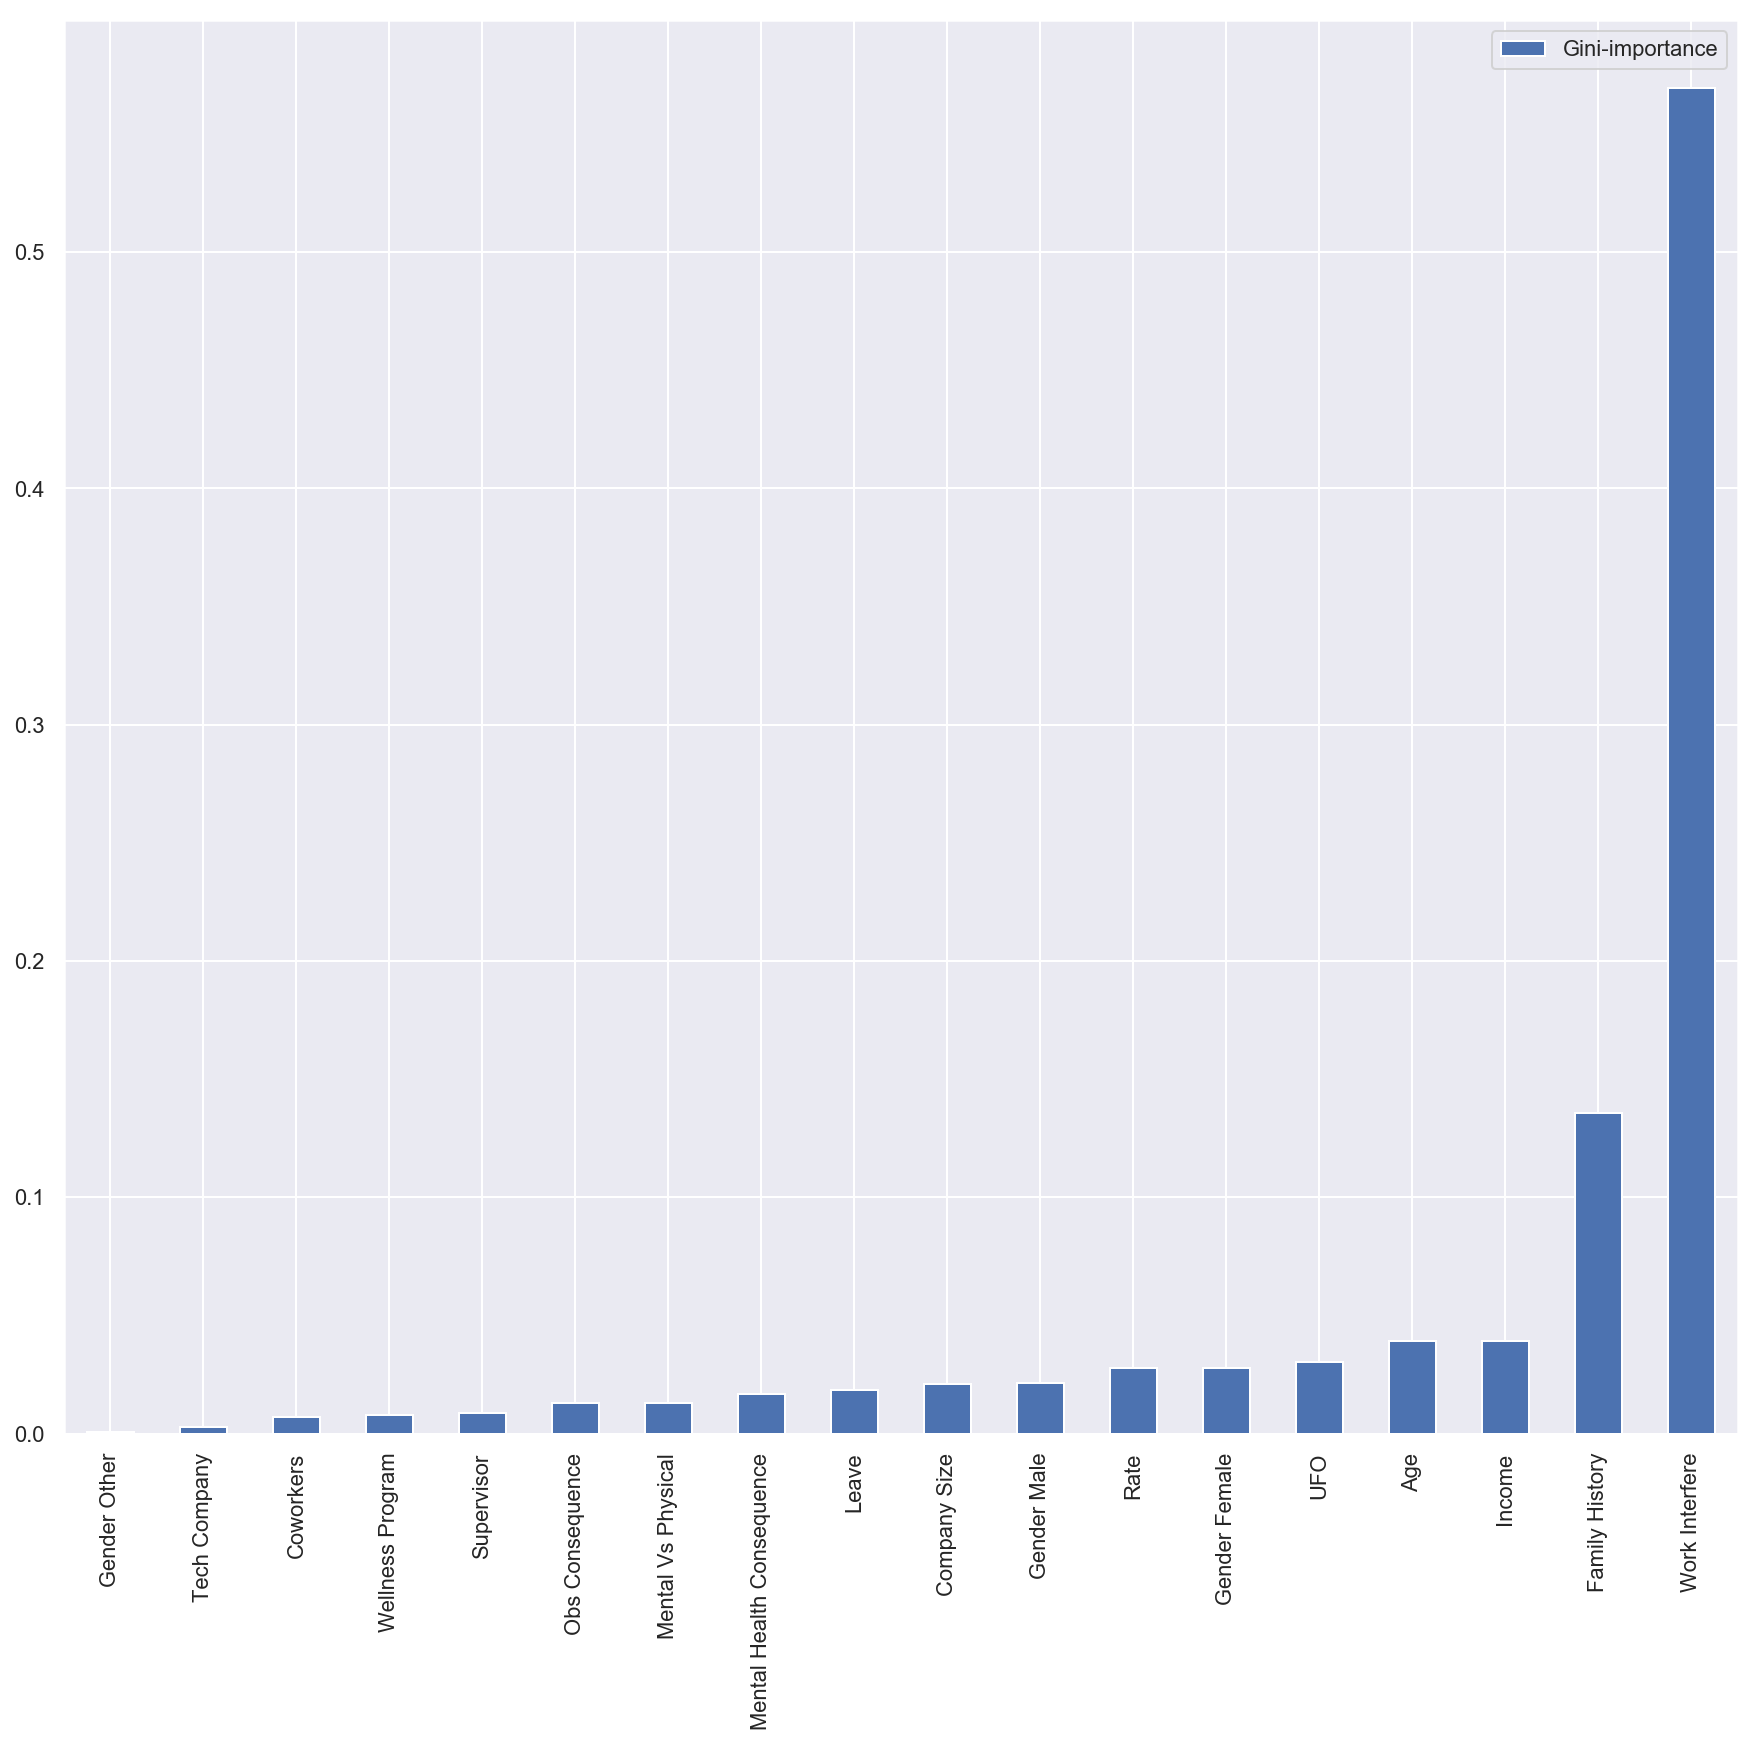

In [195]:
%matplotlib inline

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

importances.sort_values(by='Gini-importance').plot(kind='bar',figsize=(15,13));

### KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [109]:
knn.score(X_train, y_train)

0.7281553398058253

In [110]:
knn.score(X_test, y_test)

0.5203619909502263

In [111]:
confusion_matrix(y_test, knn.predict(X_test))

array([[49, 54],
       [52, 66]])

In [112]:
roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])

0.5404393615270693

### Naive Bayes

In [113]:
from sklearn.naive_bayes import BernoulliNB

In [114]:
nb = BernoulliNB()

In [115]:
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.8054298642533937

In [116]:
nb.score(X_train, y_train)

0.8310679611650486

In [117]:
confusion_matrix(y_test, nb.predict(X_test))

array([[80, 23],
       [20, 98]])

In [118]:
roc_auc_score(y_test, nb.predict_proba(X_test)[:,1])

0.8709889748231034

### Decision Tree

In [119]:
from sklearn.tree import DecisionTreeClassifier


In [120]:
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
dt.score(X_test, y_test)

0.8144796380090498

In [122]:
dt.score(X_train, y_train)

0.9087378640776699

In [123]:
dt.feature_importances_

array([2.78890525e-02, 0.00000000e+00, 6.93098333e-04, 0.00000000e+00,
       5.18134796e-02, 0.00000000e+00, 1.68698879e-02, 3.34484061e-02,
       0.00000000e+00, 1.75670773e-02, 4.00411502e-02, 2.19988284e-02,
       2.97525138e-03, 0.00000000e+00, 7.78538511e-03, 0.00000000e+00,
       0.00000000e+00, 7.78918383e-01])

In [124]:
roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])

0.8020816192200099

In [125]:
confusion_matrix(y_test, dt.predict(X_test))

array([[ 77,  26],
       [ 15, 103]])

## ROC Corves confusion

In [136]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, logr.predict_proba(X_scaler_test)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
fpr5, tpr5, thresholds5 = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

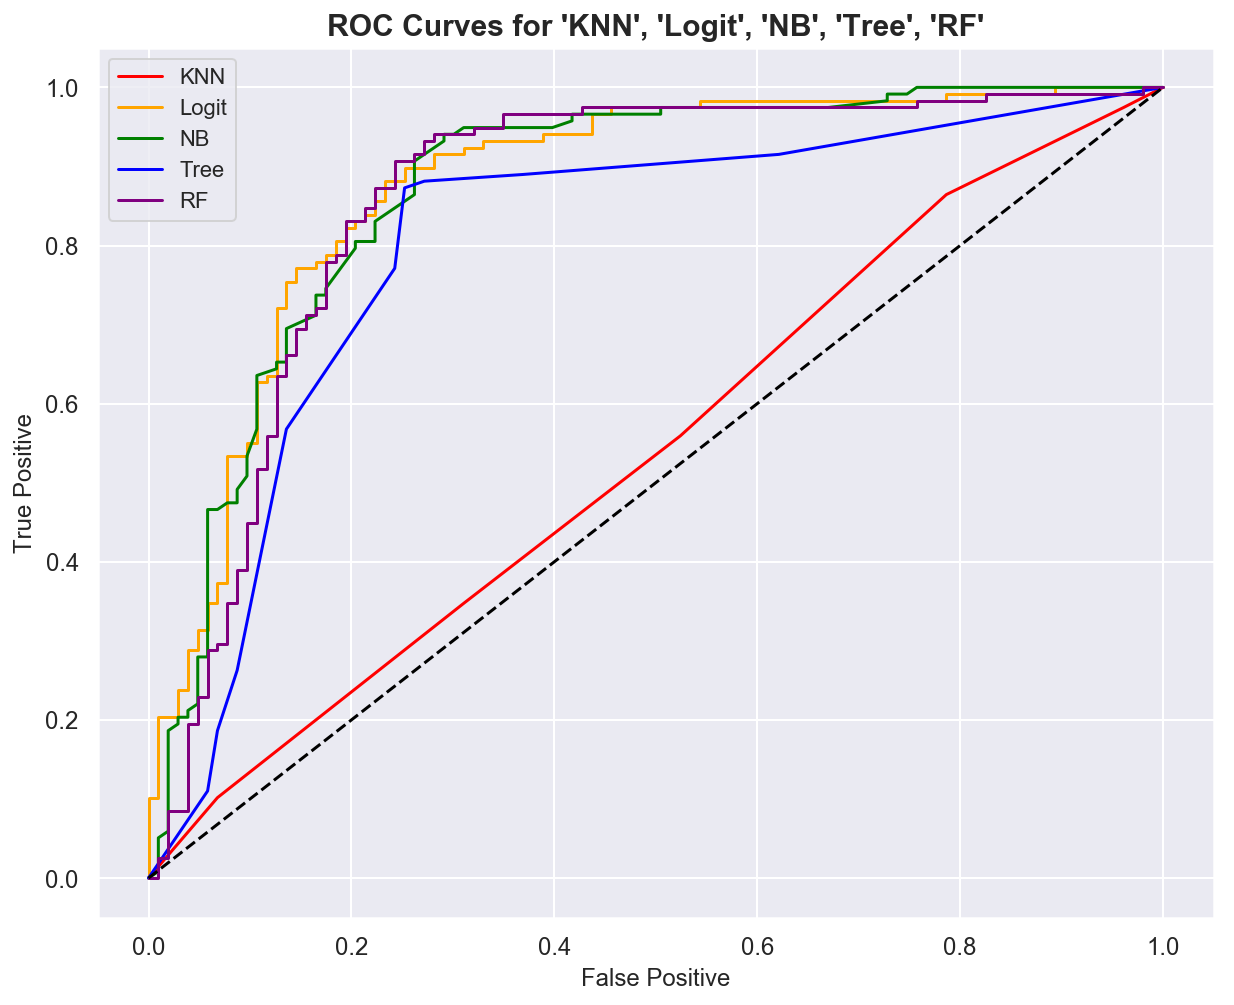

In [137]:
plt.figure(figsize = (10, 8))
plt.plot(fpr1, tpr1, color = 'red')
plt.plot(fpr2, tpr2, color = 'orange')
plt.plot(fpr3, tpr3, color = 'green')
plt.plot(fpr4, tpr4, color = 'blue')
plt.plot(fpr5, tpr5, color = 'purple')
plt.plot([0, 1], [0, 1], c = 'black', ls = '--')

plt.title("ROC Curves for 'KNN', 'Logit', 'NB', 'Tree', 'RF'", fontsize = 15, 
          fontweight = 'bold')
plt.xlabel("False Positive", fontsize = 12)
plt.ylabel("True Positive", fontsize = 12)
plt.xticks(fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
plt.legend(['KNN', 'Logit', 'NB', 'Tree', 'RF'])

plt.show()
plt.close()